# **Load Data**

**Data link** : https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis 🔗

In [476]:
# Loading data
tweets_data = pd.read_csv('/content/twitter_training.csv')

In [477]:
# showing data
tweets_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [478]:
# Data shape
tweets_data.shape

(74681, 4)

In [479]:
# Adding headers to data
tweets_data = pd.read_csv('/content/twitter_training.csv', header=None)
tweets_data.columns = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']
tweets_data.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [480]:
tweets_data.shape

(74682, 4)

# **Features Engineering**

## **Cleaning Data**

In [481]:
# Showing empty data
print(tweets_data.isnull().sum())

Tweet ID           0
entity             0
sentiment          0
Tweet content    686
dtype: int64


In [482]:
# Counting data targets values
tweets_data['sentiment'].value_counts()

,count
sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [483]:
# Deleting 'Irrelevant' sentiment
tweets_data = tweets_data[tweets_data['sentiment'] != 'Irrelevant']

In [484]:
tweets_data['sentiment'].value_counts()

,count
sentiment,
Negative,22542
Positive,20832
Neutral,18318


In [485]:
tweets_data.shape

(61692, 4)

In [486]:
# Changing alphabet data to numeric
tweets_data.replace({'sentiment':{
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1,}}, inplace=True)

/tmp/ipython-input-4240605979.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tweets_data.replace({'sentiment':{


In [487]:
tweets_data.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...
1,2401,Borderlands,1,I am coming to the borders and I will kill you...
2,2401,Borderlands,1,im getting on borderlands and i will kill you ...
3,2401,Borderlands,1,im coming on borderlands and i will murder you...
4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...


## **Deleting Stopwords & lemmatization**

In [488]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

# Stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('im')  # Adding 'im' to stopwords (exinting in first text)

# Lemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [489]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [490]:
def clean_tweet_stopword_lemmatize(text):
    # Lowercase
    text = text.lower()
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    # Keep only letters and spaces
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Split words
    words = text.split()
    # Remove stopwords first
    words_no_stop = [word for word in words if word not in stop_words]
    # POS tagging and lemmatization
    words_pos = pos_tag(words_no_stop)
    lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_pos]

    return " ".join(lemmatized_words)


In [491]:
tweets_data['Tweet content'] = tweets_data['Tweet content'].astype(str)
tweets_data['Tweet_content_clean'] = tweets_data['Tweet content'].apply(clean_tweet_stopword_lemmatize)

In [492]:
tweets_data.head()

,Tweet ID,entity,sentiment,Tweet content,Tweet_content_clean
0,2401,Borderlands,1,im getting on borderlands and i will murder yo...,get borderland murder
1,2401,Borderlands,1,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,1,im getting on borderlands and i will kill you ...,get borderland kill
3,2401,Borderlands,1,im coming on borderlands and i will murder you...,come borderland murder
4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...,get borderland murder


# **Train/Test Spliting Data**

In [493]:
X = tweets_data['Tweet_content_clean']
y = tweets_data['sentiment']

In [494]:
print(X)

0                                    get borderland murder
1                                         come border kill
2                                      get borderland kill
3                                   come borderland murder
4                                    get borderland murder
                               ...                        
74677    realize window partition mac like year behind ...
74678    realize mac window partition year behind nvidi...
74679    realize window partition mac year behind nvidi...
74680    realize window partition mac like year behind ...
74681    like window partition mac like year behind dri...
Name: Tweet_content_clean, Length: 61692, dtype: object


In [495]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
74677    1
74678    1
74679    1
74680    1
74681    1
Name: sentiment, Length: 61692, dtype: int64


# **Training Model**


In [496]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [498]:
print(X.shape, X_train.shape, X_test.shape)

(61692,) (49353,) (12339,)


## **TF-IDF**

In [499]:
# Vectorizer initialization
vectorizer = TfidfVectorizer(max_features=20000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## **Logistic Regression**

In [500]:
# Fitting lr model
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=2000)

# **Evaluate Model**

In [501]:
y_train_pred = lr_model.predict(X_train_tfidf)

In [502]:
# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Classification report
print(classification_report(y_train, y_train_pred))

# Confusion matrix
print(confusion_matrix(y_train, y_train_pred))

Accuracy: 0.8543553583368793
              precision    recall  f1-score   support

          -1       0.83      0.90      0.86     18033
           0       0.88      0.80      0.84     14654
           1       0.86      0.85      0.86     16666

    accuracy                           0.85     49353
   macro avg       0.86      0.85      0.85     49353
weighted avg       0.86      0.85      0.85     49353

[[16182   800  1051]
 [ 1678 11788  1188]
 [ 1658   813 14195]]


In [503]:
y_test_pred = lr_model.predict(X_test_tfidf)

In [504]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification report
print(classification_report(y_test, y_test_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_test_pred))


Accuracy: 0.8011184050571359
              precision    recall  f1-score   support

          -1       0.78      0.86      0.82      4509
           0       0.81      0.74      0.77      3664
           1       0.82      0.80      0.81      4166

    accuracy                           0.80     12339
   macro avg       0.80      0.80      0.80     12339
weighted avg       0.80      0.80      0.80     12339

[[3860  309  340]
 [ 554 2713  397]
 [ 518  336 3312]]


## **Visualization Model Evaluation**

In [505]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [506]:
# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

# Classification report for test
report_test = classification_report(y_test, y_test_pred, output_dict=True)
report_train = classification_report(y_train, y_train_pred, output_dict=True)


/tmp/ipython-input-2136933599.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=acc_values, palette=colors)


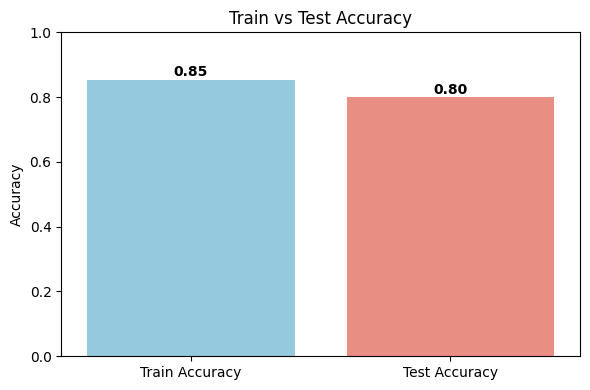

In [507]:
# Train vs Test Accuracy Plot
acc_values = [train_acc, test_acc]
labels = ['Train Accuracy', 'Test Accuracy']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=acc_values, palette=colors)
plt.ylim(0,1)
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")

# Add numbers on top of bars
for i, v in enumerate(acc_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

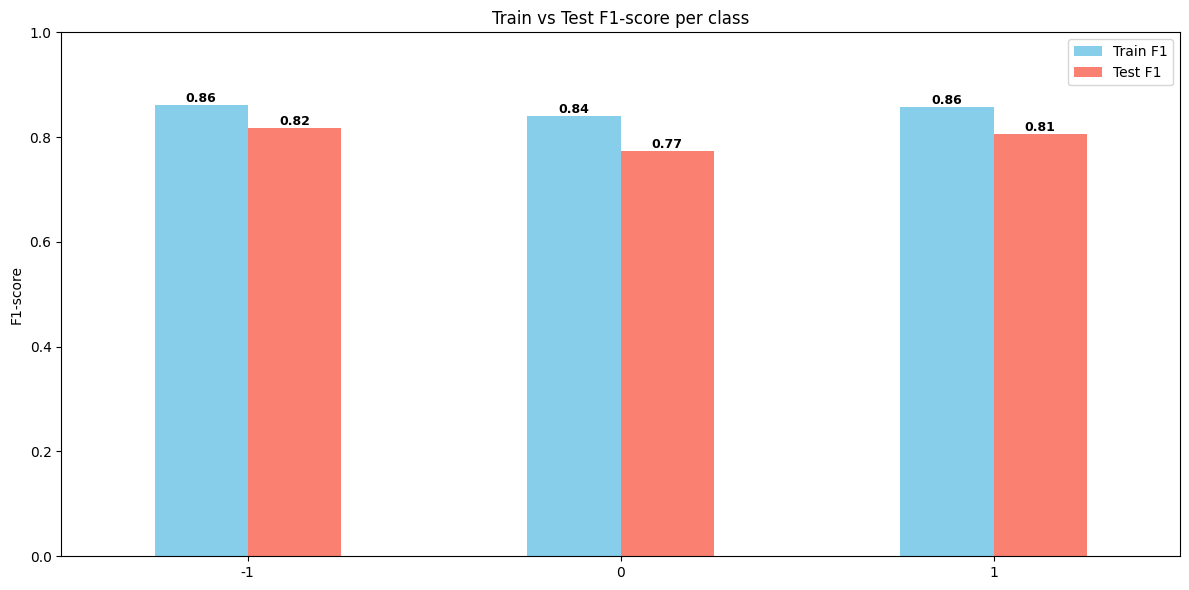

In [508]:
# Prepare DataFrame
df_train_f1 = pd.DataFrame(report_train).transpose().iloc[:-3, 2]
df_test_f1  = pd.DataFrame(report_test).transpose().iloc[:-3, 2]
df_compare = pd.DataFrame({'Train F1': df_train_f1, 'Test F1': df_test_f1})

# Plot with different colors for Train vs Test
ax = df_compare.plot(kind='bar', figsize=(12,6), color=['skyblue', 'salmon'])
plt.title("Train vs Test F1-score per class")
plt.ylabel("F1-score")
plt.ylim(0,1)
plt.xticks(rotation=0)

# Add numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

# **Saving & Loading Model and TF_IDF**

In [509]:
import pickle

# Save Logistic Regression model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [510]:
import pickle

# Load Logistic Regression model
with open('logistic_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

# Load TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# **Prediction Function**

In [511]:
def predict_sentiment(text):
    clean_text = clean_tweet_stopword_lemmatize(text)
    vectorized = vectorizer.transform([clean_text])
    return lr_model.predict(vectorized)[0]

In [512]:
tweet = input("Write a phrase : ")
sentiment = predict_sentiment(tweet)
if sentiment == 1 :
  print("Positive")
elif sentiment == 0 :
  print("Neutral")
else :
  print("Negative")

Write a phrase : it is a good day
Positive
